In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [27]:
'''
    Here we read our google form response csv file and store it
    as a pandas dataframe.
'''
df = pd.read_csv('DP_tendency.csv')
df.head(5)

,Timestamp,Email Address,Name,Institution,In which category you belong to,How Many object oriented languages do you use ?,"On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about polymorphism","On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about encapsulation","On a scale of 1 to 5, where 1 representing for low and 5 representing high, please rate your depth of knowledge about inheritance","How many Gang of Four (Creational, Structural, and Behavioral ) design patterns do you know?",...,"In what percent of your projects, you have used design patterns?",Average LOC (line of code) per project?,Average team size(number of team members) per project?,Average time needed per project? (in working days),What is your most used pattern ?,"""Projects with design patterns tend to produce less bugs after release, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns need less time for a new feature integration, compared to projects without design pattern"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns results in less added cost for updates, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""High rate of design pattern application in a software project improves project maintainability"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree",Any Comments about our research
0,11/27/2021 15:04:24,bsse0920@iit.du.ac.bd,Fuad,IIT,Others,2-5,3,3,3,10 to 20,...,less than 30%,less than 10k,3,40,Factory,3,3,5,3.0,very subjective questions
1,11/27/2021 15:06:27,bsse1003@iit.du.ac.bd,Sadi,IIT,Undergrad Student,2-5,1,2,2,1 to 10,...,less than 30%,less than 10k,2,70,no pattern,3,2,3,3.0,Kop Bossss
2,11/27/2021 15:18:05,bsse0809@iit.du.ac.bd,Md. Mehedi Hasan Arif,"IIT, University of Dhaka",Undergrad Student,2-5,3,3,4,1 to 10,...,less than 30%,less than 10k,1,5,NaN,3,3,4,4.0,NaN
3,11/27/2021 15:24:39,bsse1030@iit.du.ac.bd,Abdullah Al Jahid,"IIT, DU",Undergrad Student,2-5,3,3,3,1 to 10,...,less than 30%,less than 10k,1,3,Observer,3,4,4,4.0,Nice topic to work.
4,11/27/2021 15:27:32,bsse1027@iit.du.ac.bd,Junaid Mansur Ifti,IITDU,Undergrad Student,2-5,4,3,4,1 to 10,...,less than 30%,less than 10k,2,90,Singleton,4,2,3,4.0,Love you Radowan and Co.


In [39]:
most_used_dp = df[['What is your most used pattern ?', 'In which category you belong to']]
most_used_dp =  most_used_dp.replace('no pattern', np.nan)
most_used_dp =  most_used_dp.replace('None', np.nan)
most_used_dp = most_used_dp.dropna()

a = most_used_dp[most_used_dp['What is your most used pattern ?'].str.contains("Factory")].groupby('In which category you belong to').size()
n = a.sum()
print(a, n)

In which category you belong to
Junior Software Engineer    1
Others                      3
Undergrad Student           2
dtype: int64


In [4]:
'''
    Drop out unnecessary columns (user credential, timestamp etc.) from our datafame object.
'''
df = df.drop(['Timestamp', 'Email Address', 'Name', 'Institution', 'What is your most used pattern ?', 'What is your most favorite design pattern among the GoF (Gang of Four) patterns in terms of ease of implementation?', 'Any Comments about our research'], axis=1)
df.head()

,In which category you belong to,How Many object oriented languages do you use ?,"On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about polymorphism","On a scale of 1 to 5, where 1 representing low and 5 representing high, please rate your depth of knowledge about encapsulation","On a scale of 1 to 5, where 1 representing for low and 5 representing high, please rate your depth of knowledge about inheritance","How many Gang of Four (Creational, Structural, and Behavioral ) design patterns do you know?",How many design patterns( Gang of Four) have you implemented as an assignment or dummy project?,"In what percent of your projects, you have used design patterns?",Average LOC (line of code) per project?,Average team size(number of team members) per project?,Average time needed per project? (in working days),"""Projects with design patterns tend to produce less bugs after release, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns need less time for a new feature integration, compared to projects without design pattern"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""Projects with design patterns results in less added cost for updates, compared to projects without design pattern"" . On a scale of 1 to 5, how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree","""High rate of design pattern application in a software project improves project maintainability"" . On a scale of 1 to 5 how strongly do you support the statement, where 1 is representing strongly disagree and 5 is representing strongly agree"
0,Others,2-5,3,3,3,10 to 20,5 to 10,less than 30%,less than 10k,3,40,3,3,5,3.0
1,Undergrad Student,2-5,1,2,2,1 to 10,1 to 5,less than 30%,less than 10k,2,70,3,2,3,3.0
2,Undergrad Student,2-5,3,3,4,1 to 10,1 to 5,less than 30%,less than 10k,1,5,3,3,4,4.0
3,Undergrad Student,2-5,3,3,3,1 to 10,1 to 5,less than 30%,less than 10k,1,3,3,4,4,4.0
4,Undergrad Student,2-5,4,3,4,1 to 10,1 to 5,less than 30%,less than 10k,2,90,4,2,3,4.0


In [5]:
'''
    Change our column's name with some suitable and short name
'''
new_column_name = ['category', 'number_of_known_oop_language', 'polymorphism_knowledge', 'encapsulation_knowledge', 'inheritance_knowledge', 'known_DP', 'implemented_DP', 'dp_use_percentage', 
'LOC', 'team_size', 'time_per_project', 'bug_reduction', 'time_reduction', 'cost_reduction', 'improve_maintainability']
renamed_columns = {}
for i, column in enumerate(df.columns):
    renamed_columns[column] = new_column_name[i]
# print(renamed_columns)
df = df.rename(columns=renamed_columns)
df.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability
0,Others,2-5,3,3,3,10 to 20,5 to 10,less than 30%,less than 10k,3,40,3,3,5,3.0
1,Undergrad Student,2-5,1,2,2,1 to 10,1 to 5,less than 30%,less than 10k,2,70,3,2,3,3.0
2,Undergrad Student,2-5,3,3,4,1 to 10,1 to 5,less than 30%,less than 10k,1,5,3,3,4,4.0
3,Undergrad Student,2-5,3,3,3,1 to 10,1 to 5,less than 30%,less than 10k,1,3,3,4,4,4.0
4,Undergrad Student,2-5,4,3,4,1 to 10,1 to 5,less than 30%,less than 10k,2,90,4,2,3,4.0


In [6]:
'''
    We convert our categorical data into numeric values.
'''
df['category'].replace(to_replace=['Undergrad Student', 'Intern/ Software Engineer Trainee (Completed / ongoing)', 'Junior Software Engineer', 'Others'], value=['student', 'student', 'professional', 'professional'], inplace=True)
df['number_of_known_oop_language'].replace(to_replace=['1', '2-5', '5-10', 'more than 10'], value=[1, 3, 7, 12], inplace=True)
df['known_DP'].replace(to_replace=['0', '1 to 10', '10 to 20', 'More than 20'], value=[0, 5, 15, 20], inplace=True)
df['implemented_DP'].replace(to_replace=['0', '1 to 5', '5 to 10', '11 to 15', 'more than 15'], value=[0, 3, 7, 13, 16], inplace=True)
df['dp_use_percentage'].replace(to_replace=['less than 30%', '31% to 60%', '61% to 90%', 'more than 90%'], value=[5, 10, 15, 20], inplace=True)
df['LOC'].replace(to_replace=['less than 10k', '10k to 100k', '100k to 1M', 'more than 1M'], value=[5, 25, 125 , 500], inplace=True)
df.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability
0,professional,3,3,3,3,15,7,5,5,3,40,3,3,5,3.0
1,student,3,1,2,2,5,3,5,5,2,70,3,2,3,3.0
2,student,3,3,3,4,5,3,5,5,1,5,3,3,4,4.0
3,student,3,3,3,3,5,3,5,5,1,3,3,4,4,4.0
4,student,3,4,3,4,5,3,5,5,2,90,4,2,3,4.0


In [7]:
'''
    we calculate some derived metrics
    Store calculated derived metrics in some new columns of Dataframe.
    Here we calculate our main measurement metrics 'DesignPattern_Implementation_Tendency_Score' and
    Store it in 'DP_tendency_score' column
'''
df['OOP_knowledge'] = df[['number_of_known_oop_language', 'polymorphism_knowledge', 'encapsulation_knowledge', 'inheritance_knowledge']].mean(axis=1)
df['knowledge_score'] = df[['OOP_knowledge', 'known_DP', 'implemented_DP']].mean(axis=1)
df['experience_score'] = ((df['LOC']/df['time_per_project']) + df['team_size'] + df['dp_use_percentage'])/3
df['effeciency_score'] = df[['bug_reduction', 'time_reduction', 'cost_reduction', 'improve_maintainability']].mean(axis=1)
df['DP_tendency_score'] = df[['knowledge_score', 'experience_score', 'effeciency_score']].mean(axis=1)
df.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
0,professional,3,3,3,3,15,7,5,5,3,40,3,3,5,3.0,3.00,8.333333,2.708333,3.50,4.847222
1,student,3,1,2,2,5,3,5,5,2,70,3,2,3,3.0,2.00,3.333333,2.357143,2.75,2.813492
2,student,3,3,3,4,5,3,5,5,1,5,3,3,4,4.0,3.25,3.750000,2.333333,3.50,3.194444
3,student,3,3,3,3,5,3,5,5,1,3,3,4,4,4.0,3.00,3.666667,2.555556,3.75,3.324074
4,student,3,4,3,4,5,3,5,5,2,90,4,2,3,4.0,3.50,3.833333,2.351852,3.25,3.145062


<AxesSubplot:>

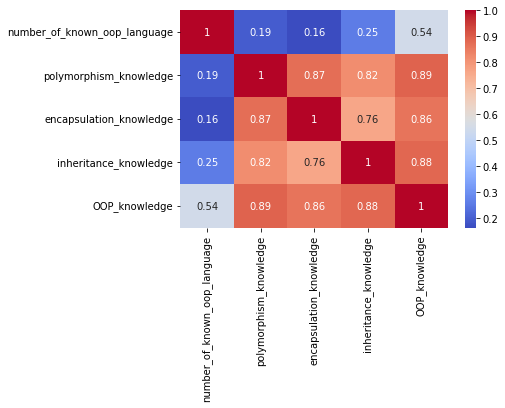

In [8]:
'''
    show the correlation among the derived metrics and direct metrics
'''
sns.heatmap(df[['number_of_known_oop_language', 'polymorphism_knowledge', 'encapsulation_knowledge', 'inheritance_knowledge', 'OOP_knowledge']].corr(),annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

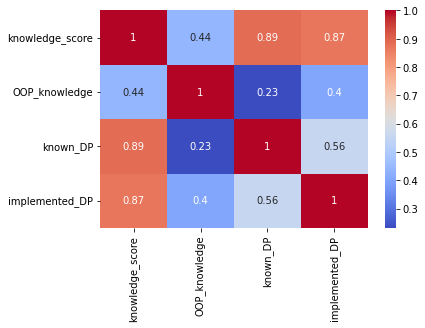

In [9]:
'''
    show the correlation among the derived metrics and direct metrics
'''
sns.heatmap(df[['knowledge_score', 'OOP_knowledge', 'known_DP', 'implemented_DP']].corr(),annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

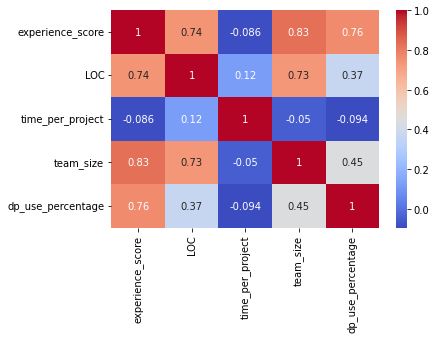

In [10]:
'''
    show the correlation among the derived metrics and direct metrics
'''
sns.heatmap(df[['experience_score', 'LOC', 'time_per_project', 'team_size', 'dp_use_percentage']].corr(),annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

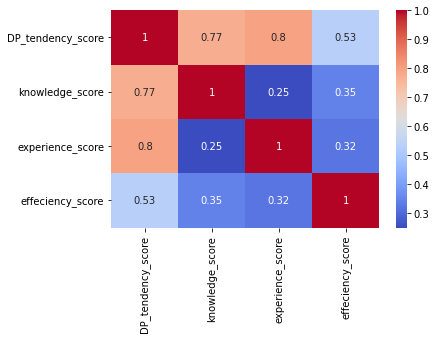

In [11]:
'''
    show the correlation among the derived metrics and direct metrics
'''
sns.heatmap(df[['DP_tendency_score', 'knowledge_score', 'experience_score', 'effeciency_score']].corr(),annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

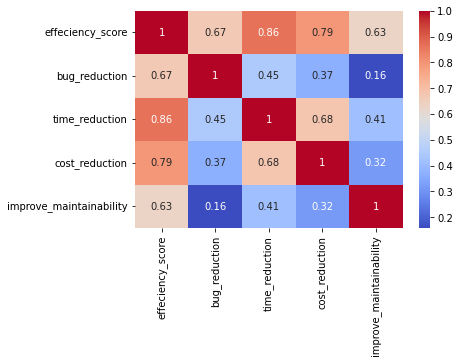

In [12]:
'''
    show the correlation among the derived metrics and direct metrics
'''
sns.heatmap(df[['effeciency_score', 'bug_reduction', 'time_reduction', 'cost_reduction', 'improve_maintainability']].corr(),annot = True, fmt='.2g',cmap= 'coolwarm')

In [13]:
'''
    Now, we try to see the design pattern tendency of Student and 
    Professionals group separately. 
'''
students = df[df.category == 'student']
students.head(5)

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
1,student,3,1,2,2,5,3,5,5,2,70,3,2,3,3.0,2.00,3.333333,2.357143,2.75,2.813492
2,student,3,3,3,4,5,3,5,5,1,5,3,3,4,4.0,3.25,3.750000,2.333333,3.50,3.194444
3,student,3,3,3,3,5,3,5,5,1,3,3,4,4,4.0,3.00,3.666667,2.555556,3.75,3.324074
4,student,3,4,3,4,5,3,5,5,2,90,4,2,3,4.0,3.50,3.833333,2.351852,3.25,3.145062
5,student,3,2,2,2,5,3,5,5,2,90,3,2,3,4.0,2.25,3.416667,2.351852,3.00,2.922840


<AxesSubplot:>

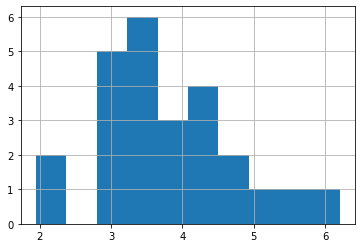

In [14]:
'''
    Histogram show the student's design pattern implementation tendency distribution 
'''

students['DP_tendency_score'].hist()

In [15]:
'''
    We extract a new datafame for professionals and try to understand
    the design pattern tendency of professionals group.
'''

professionals = df[df.category == 'professional']
professionals.head()

,category,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score
0,professional,3,3,3,3,15,7,5,5,3,40,3,3,5,3.0,3.00,8.333333,2.708333,3.50,4.847222
10,professional,3,4,5,4,15,13,15,25,3,180,3,4,5,4.0,4.00,10.666667,6.046296,4.00,6.904321
15,professional,3,5,5,5,5,3,5,25,5,25,4,4,4,3.0,4.50,4.166667,3.666667,3.75,3.861111
16,professional,1,3,3,3,5,13,5,25,6,300,4,4,3,4.0,2.50,6.833333,3.694444,3.75,4.759259
17,professional,3,3,3,4,5,3,10,5,3,50,5,4,4,4.0,3.25,3.750000,4.366667,4.25,4.122222


<AxesSubplot:>

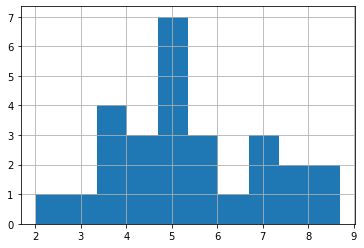

In [16]:
'''
    Histogram show the professional's design pattern implementation tendency distribution 
'''
professionals['DP_tendency_score'].hist()

In [17]:
'''
    Now we have 2 sample
    one is for students and
    one for professionals
    we try to see the average score of design pattern implementation between the two group
''' 
students.DP_tendency_score.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1     2.813492
2     3.194444
3     3.324074
4     3.145062
5     2.922840
6     3.296296
7     3.579365
8     4.388889
9     3.398148
11    4.787037
12    5.046296
13    1.944444
14    3.870370
18    3.555556
20    6.212963
21    3.777778
22    4.698148
26    2.037037
27    3.685185
28    3.027778
30    5.759259
34    3.629630
36    4.148148
39    4.444444
43    4.250000
Name: DP_tendency_score, dtype: float64>

In [18]:
# Average DP_tendency_score of Professional's group
professionals.DP_tendency_score.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     4.847222
10    6.904321
15    3.861111
16    4.759259
17    4.122222
19    5.023148
23    6.395833
24    4.753086
25    5.986111
29    4.166667
31    7.547619
32    6.731481
33    7.101852
35    8.148148
37    5.382716
38    5.180556
40    2.013889
41    3.606481
42    3.458333
44    3.291667
45    3.444446
46    7.650463
47    5.079365
48    4.589506
49    4.722222
50    8.700617
51    5.529167
Name: DP_tendency_score, dtype: float64>

In [19]:
import scipy.stats as stats

In [20]:
'''
    We assume that , professional's group have higher design pattern implementation tendancy than Students group.
    here, μ1 = mean 'DP_tendency_score' of professional users group
          μ2 = mean 'DP_tendency_score' of student users group
    So, Our null hypothesis (H0): μ1 = μ2
        Alternative hypothesis (HA): μ1 > μ2
    Here, We perform a 2 sample t-test to see, if we reject the null hypothesis with Higher Confidence Interval value
'''
t_stat, p_val = stats.ttest_ind(students['DP_tendency_score'], professionals['DP_tendency_score'], equal_var=False)
print(t_stat, p_val)

-3.978018818395641 0.000258361357531314


In [21]:
df1 = df.drop('category', axis=1)
df_norm = (df1-df1.min())/(df1.max()-df1.min())
df_norm = pd.concat((df_norm, df.category), 1)
df_norm.head(5)

C:\Users\iit\AppData\Local\Temp/ipykernel_10180/2498064447.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_norm = pd.concat((df_norm, df.category), 1)


,number_of_known_oop_language,polymorphism_knowledge,encapsulation_knowledge,inheritance_knowledge,known_DP,implemented_DP,dp_use_percentage,LOC,team_size,time_per_project,bug_reduction,time_reduction,cost_reduction,improve_maintainability,OOP_knowledge,knowledge_score,experience_score,effeciency_score,DP_tendency_score,category
0,0.333333,0.50,0.50,0.50,1.000000,0.4375,0.0,0.0,0.076923,3.700001e-06,0.333333,0.333333,1.000000,0.333333,0.470588,0.680851,0.027740,0.454545,0.429648,professional
1,0.333333,0.00,0.25,0.25,0.333333,0.1875,0.0,0.0,0.038462,6.700002e-06,0.333333,0.000000,0.333333,0.333333,0.235294,0.255319,0.001761,0.181818,0.128630,student
2,0.333333,0.50,0.50,0.75,0.333333,0.1875,0.0,0.0,0.000000,2.000001e-07,0.333333,0.333333,0.666667,0.666667,0.529412,0.290780,0.000000,0.454545,0.185016,student
3,0.333333,0.50,0.50,0.50,0.333333,0.1875,0.0,0.0,0.000000,0.000000e+00,0.333333,0.666667,0.666667,0.666667,0.470588,0.283688,0.016438,0.545455,0.204203,student
4,0.333333,0.75,0.50,0.75,0.333333,0.1875,0.0,0.0,0.038462,8.700003e-06,0.666667,0.000000,0.333333,0.666667,0.588235,0.297872,0.001370,0.363636,0.177707,student


In [22]:
norm_students = df_norm[df_norm.category == 'student']
norm_professionals = df_norm[df_norm.category == 'professional']
t_stat, p_val = stats.ttest_ind(norm_students['DP_tendency_score'], norm_professionals['DP_tendency_score'], equal_var=False)
print(t_stat, p_val)

-3.97801881839564 0.00025836135753131524


In [23]:
from numpy import sqrt, abs, round
from scipy.stats import norm
def twoSampZtest(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [24]:
student_mean = students['DP_tendency_score'].mean()
professional_mean = professionals['DP_tendency_score'].mean()
student_std = students['DP_tendency_score'].std()
professional_std = professionals['DP_tendency_score'].std()
n1 = len(students)
n2 = len(professionals)
print(n1, n2)

z, p = twoSampZtest(student_mean, professional_mean, 0, student_std, professional_std, n1, n2)
print (z, p)

25 27
-3.978 0.0001


In [25]:
w_stat , p_val = stats.wilcoxon(norm_students['DP_tendency_score'][:25], norm_professionals['DP_tendency_score'][:25])
print(w_stat, p_val)

52.0 0.002025127410888672


In [26]:
'''

'''

'\n    \n'